# **LAB 4**

#  *Fourier Transformation*

##### Manasvi Garg 229310259

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data
from skimage.metrics import mean_squared_error

def show(title, img):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def compute_dft_and_idft(img):
    # DFT
    dft = np.fft.fft2(img)
    dft_shifted = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1)
    
    # IDFT
    idft_shifted = np.fft.ifftshift(dft_shifted)
    img_reconstructed = np.fft.ifft2(idft_shifted)
    img_reconstructed = np.abs(img_reconstructed)
    
    # MSE
    mse = mean_squared_error(img, img_reconstructed)

    return magnitude_spectrum, img_reconstructed, mse


C:\Users\91935\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\91935\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\91935\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
def create_white_rectangle():
    img = np.zeros((256, 256), dtype=np.uint8)
    cv2.rectangle(img, (60, 90), (190, 170), 255, -1)
    return img

def create_circle():
    img = np.zeros((256, 256), dtype=np.uint8)
    cv2.circle(img, (128, 128), 60, 255, -1)
    return img

def create_vertical_lines():
    img = np.zeros((256, 256), dtype=np.uint8)
    for x in range(0, 256, 16):
        img[:, x:x+4] = 255
    return img

def create_horizontal_lines():
    img = np.zeros((256, 256), dtype=np.uint8)
    for y in range(0, 256, 16):
        img[y:y+4, :] = 255
    return img

def load_cameraman():
    return cv2.resize(data.camera(), (256, 256))

def create_chessboard():
    img = np.zeros((256, 256), dtype=np.uint8)
    s = 32
    for i in range(0, 256, s):
        for j in range(0, 256, s):
            if (i//s + j//s) % 2 == 0:
                img[i:i+s, j:j+s] = 255
    return img


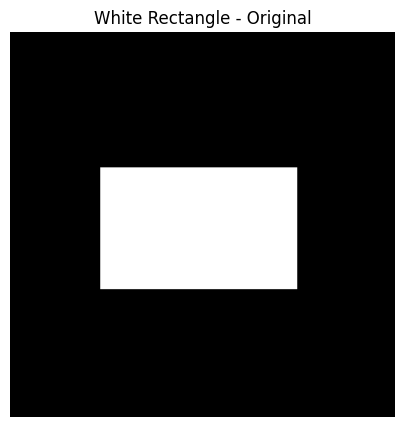

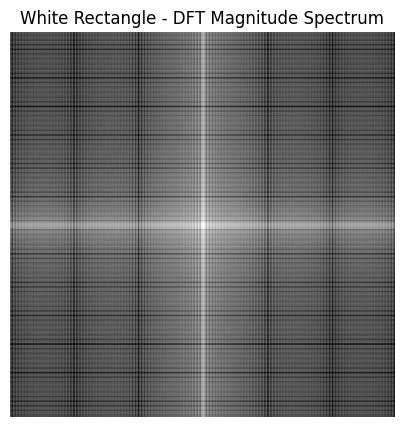

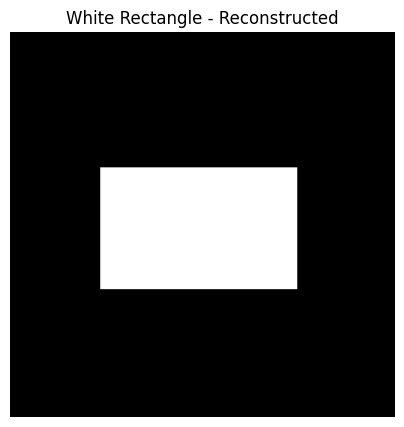

📌 MSE (White Rectangle): 0.0000


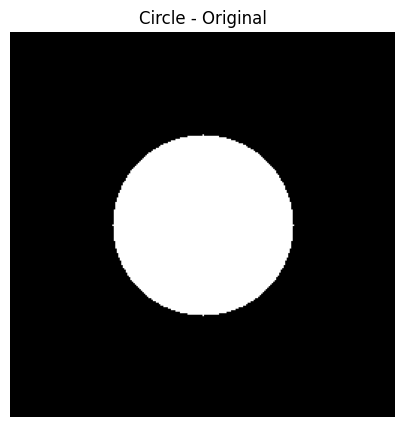

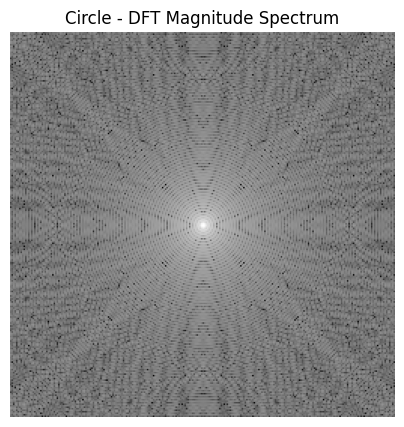

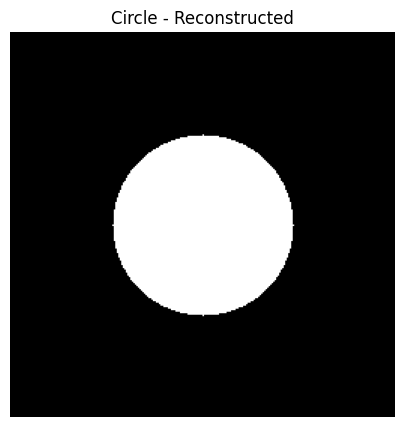

📌 MSE (Circle): 0.0000


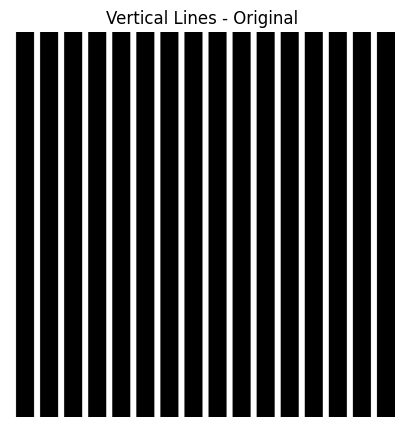

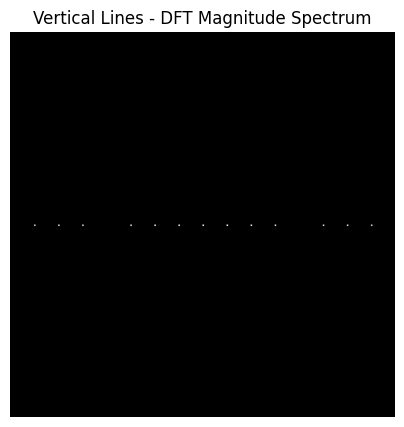

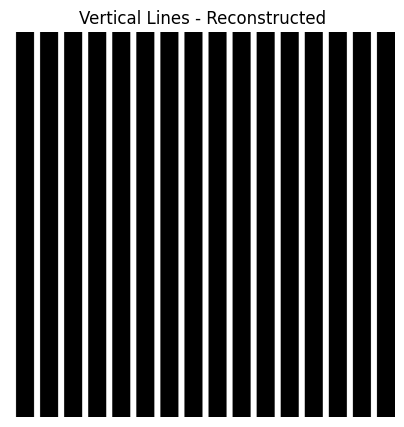

📌 MSE (Vertical Lines): 0.0000


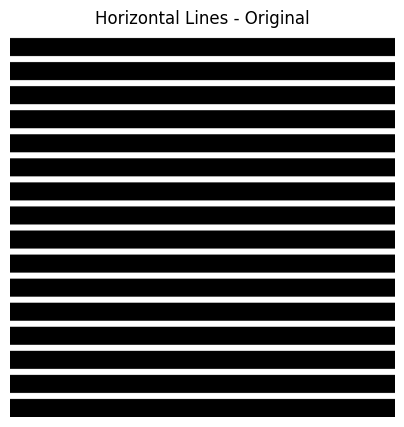

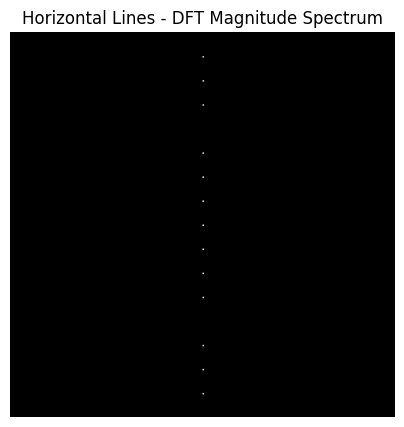

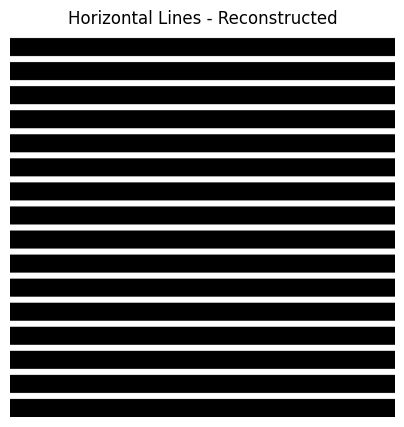

📌 MSE (Horizontal Lines): 0.0000


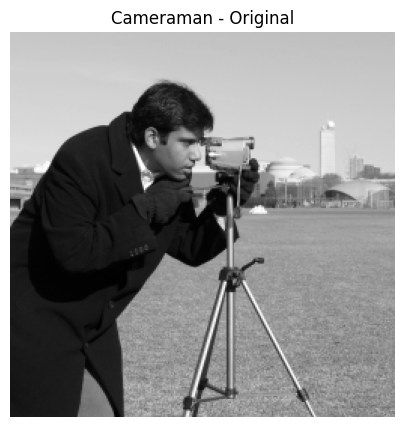

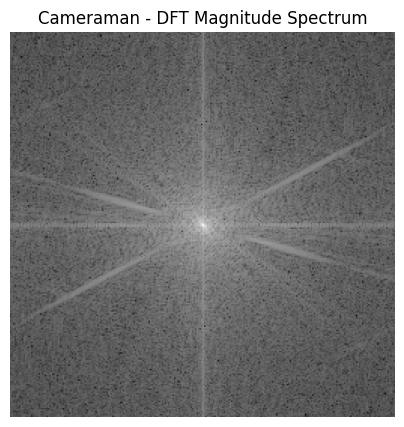

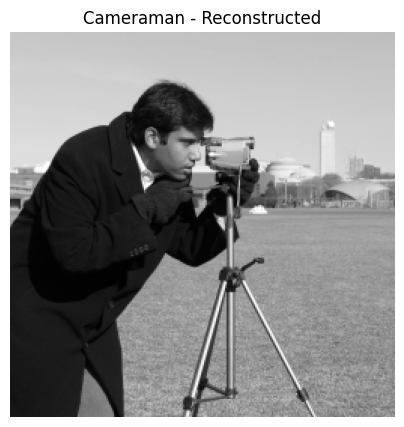

📌 MSE (Cameraman): 0.0000


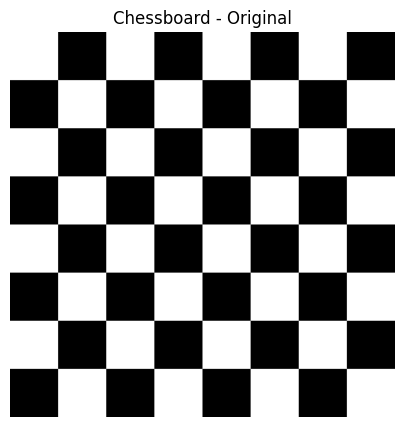

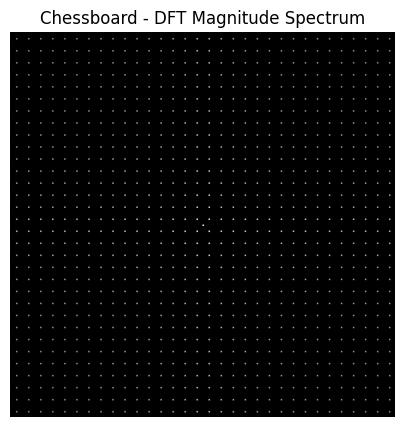

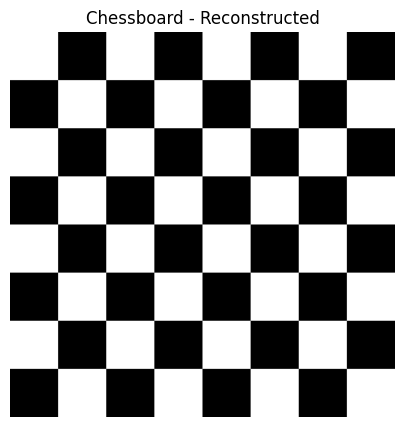

📌 MSE (Chessboard): 0.0000


In [3]:
images = {
    "White Rectangle": create_white_rectangle(),
    "Circle": create_circle(),
    "Vertical Lines": create_vertical_lines(),
    "Horizontal Lines": create_horizontal_lines(),
    "Cameraman": load_cameraman(),
    "Chessboard": create_chessboard()
}

for name, img in images.items():
    show(f"{name} - Original", img)
    
    mag, recon, mse = compute_dft_and_idft(img)
    
    show(f"{name} - DFT Magnitude Spectrum", mag)
    show(f"{name} - Reconstructed", recon)
    
    print(f"📌 MSE ({name}): {mse:.4f}")
